# Importing 

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
#seaborn style
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
sns.set_theme(style="darkgrid")
plt.rcParams.update({'figure.figsize': (15,10)})

In [166]:
# reading data
df = pd.read_csv("airline_passenger_satisfaction.csv")

# data dictionary

In [167]:
data_dictionary = pd.read_csv('data_dictionary.csv')
data_dictionary

,Field,Description
0,ID,Unique passenger identifier
1,Gender,Gender of the passenger (Female/Male)
2,Age,Age of the passenger
3,Customer Type,Type of airline customer (First-time/Returning)
4,Type of Travel,Purpose of the flight (Business/Personal)
5,Class,Travel class in the airplane for the passenger...
6,Flight Distance,Flight distance in miles
7,Departure Delay,Flight departure delay in minutes
8,Arrival Delay,Flight arrival delay in minutes
9,Departure and Arrival Time Convenience,Satisfaction level with the convenience of the...


# data exploration

In [168]:
df.columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [169]:
df.describe

<bound method NDFrame.describe of             ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                 

In [170]:
df.info

<bound method DataFrame.info of             ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   

# data cleaning

In [171]:
# Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay,393,0.003026
ID,0,0.000000
Gate Location,0,0.000000
Baggage Handling,0,0.000000
In-flight Entertainment,0,0.000000


##### it is look like Arrival dealay have a lot of missing values
##### I think replacing null values with mean will be the best solution

In [172]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Arrival Delay'].mean())

In [173]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.drop(columns='Arrival Delay',axis = 1)
del df[df. columns[0]]

# EDA


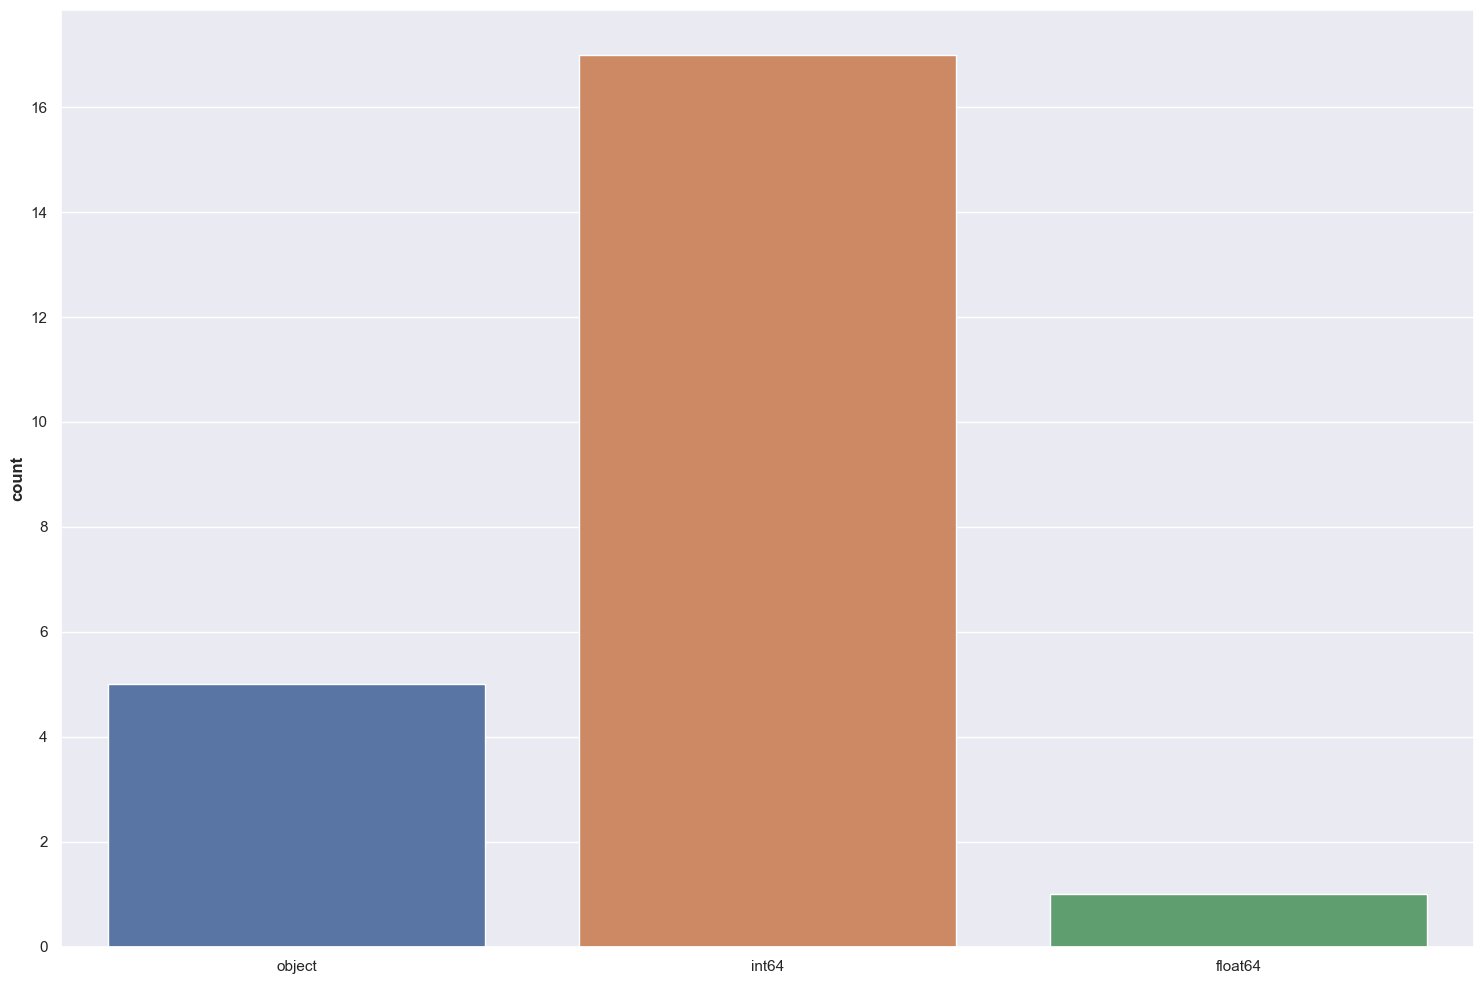

In [174]:
# count of datatypes
sns.countplot(x=df.dtypes.map(str))
plt.show()

##### most of the data are in the form of ((int64))

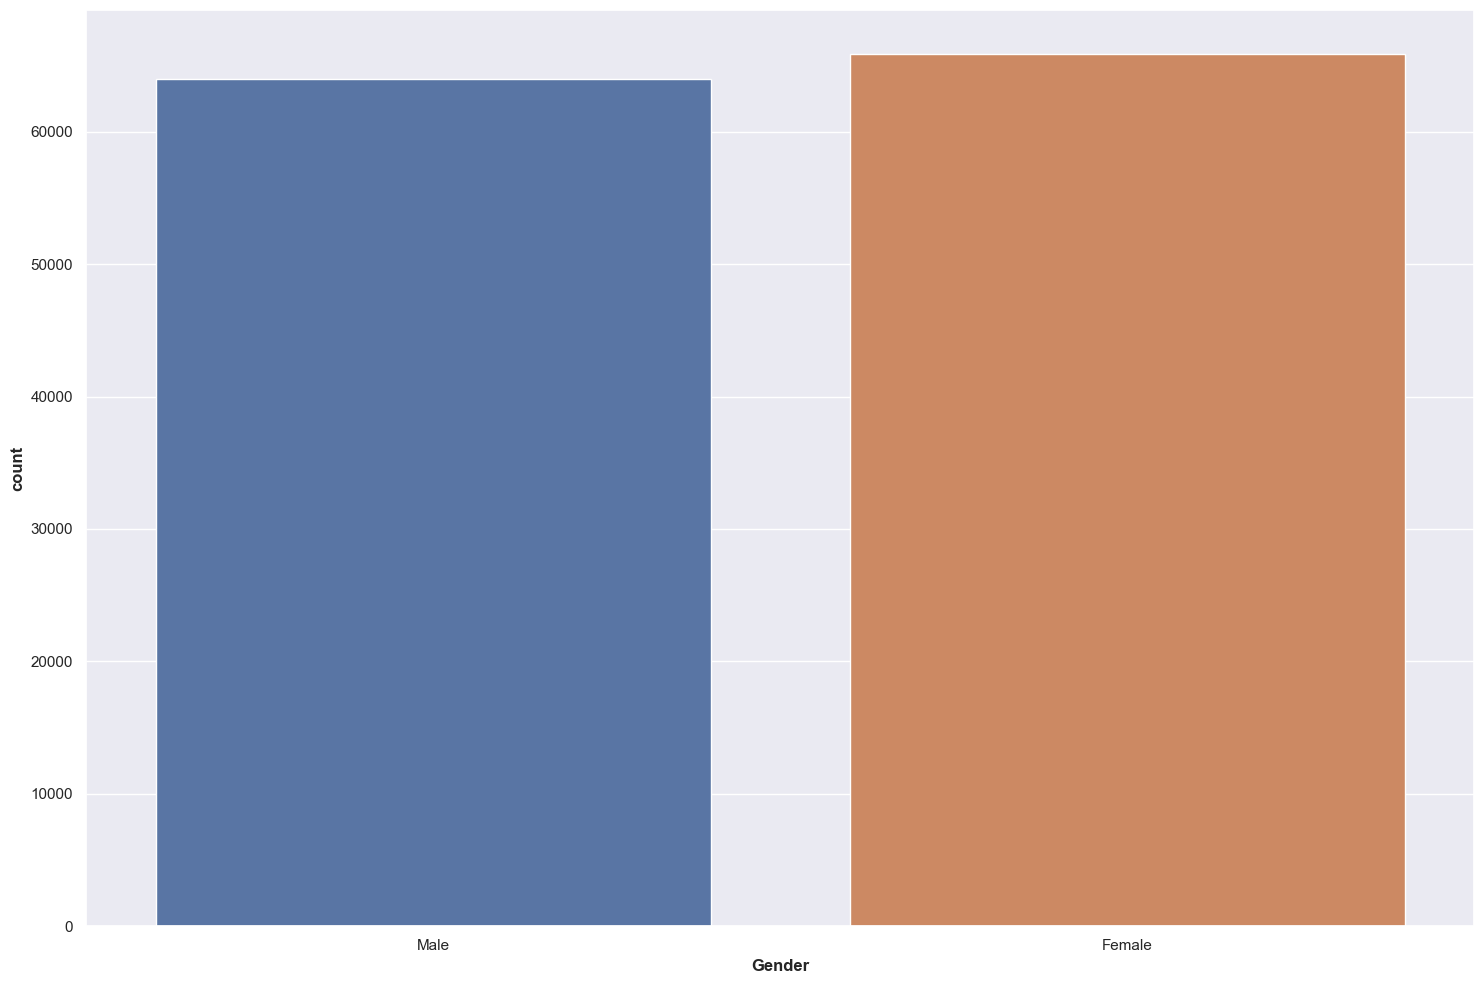

In [175]:
# count of Gender
sns.countplot(x=df['Gender'])
plt.show()

##### there are more females customers than males

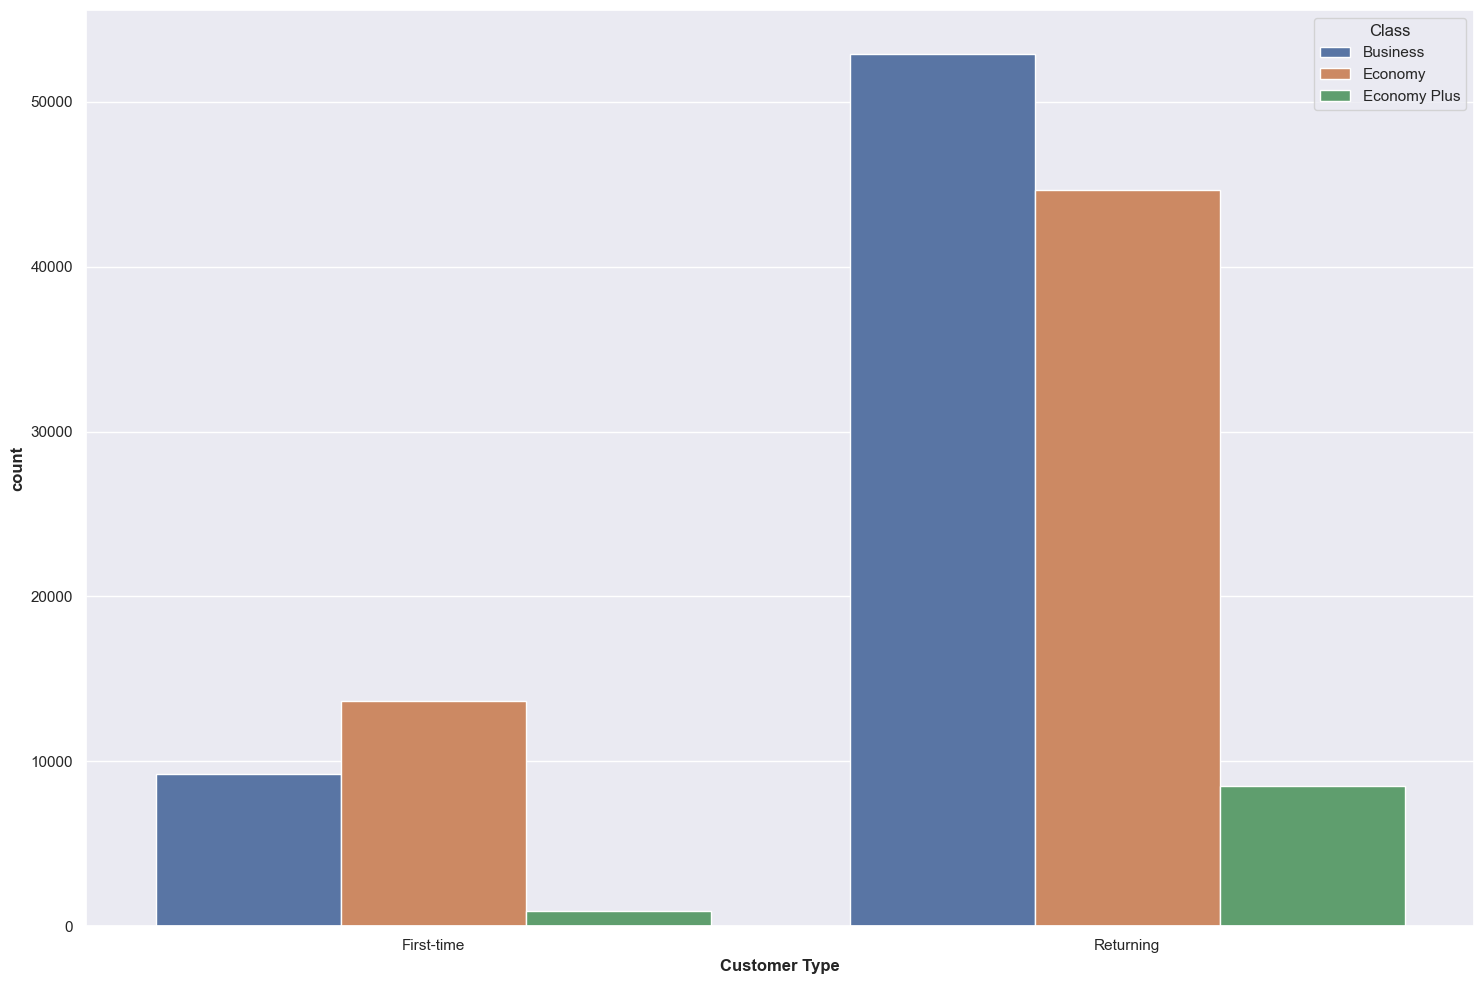

In [176]:
#count of Customer Type
sns.countplot(x=df['Customer Type'],hue=df['Class'])
plt.show()

#### more than 75% of the Customer Type are Returning this is a good indicator about quality

In [177]:
df['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

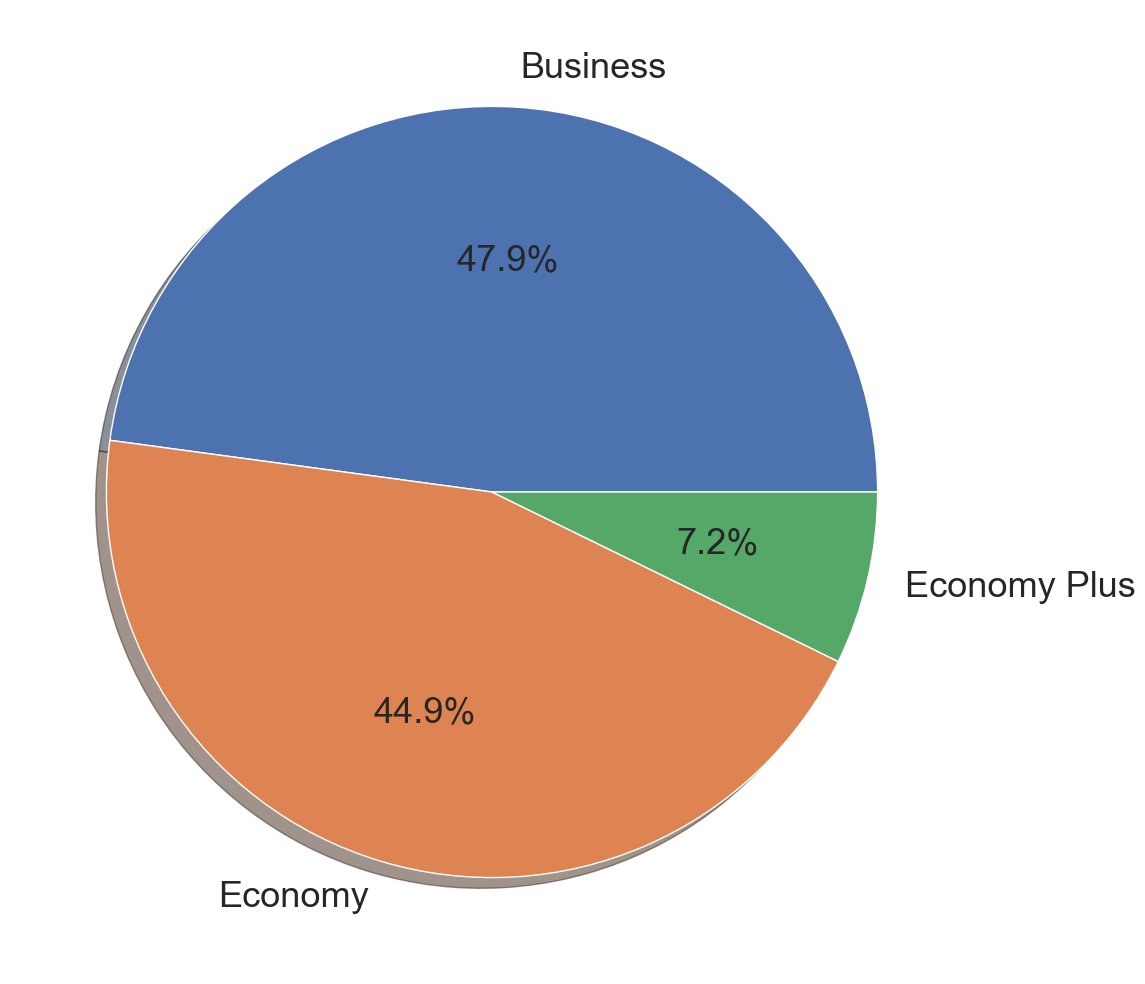

In [178]:
plt.pie(x=df['Class'].value_counts(), labels=['Business','Economy','Economy Plus'],
                                          autopct='%1.1f%%', 
                                          shadow=True, 
                                          textprops={'fontsize':26});

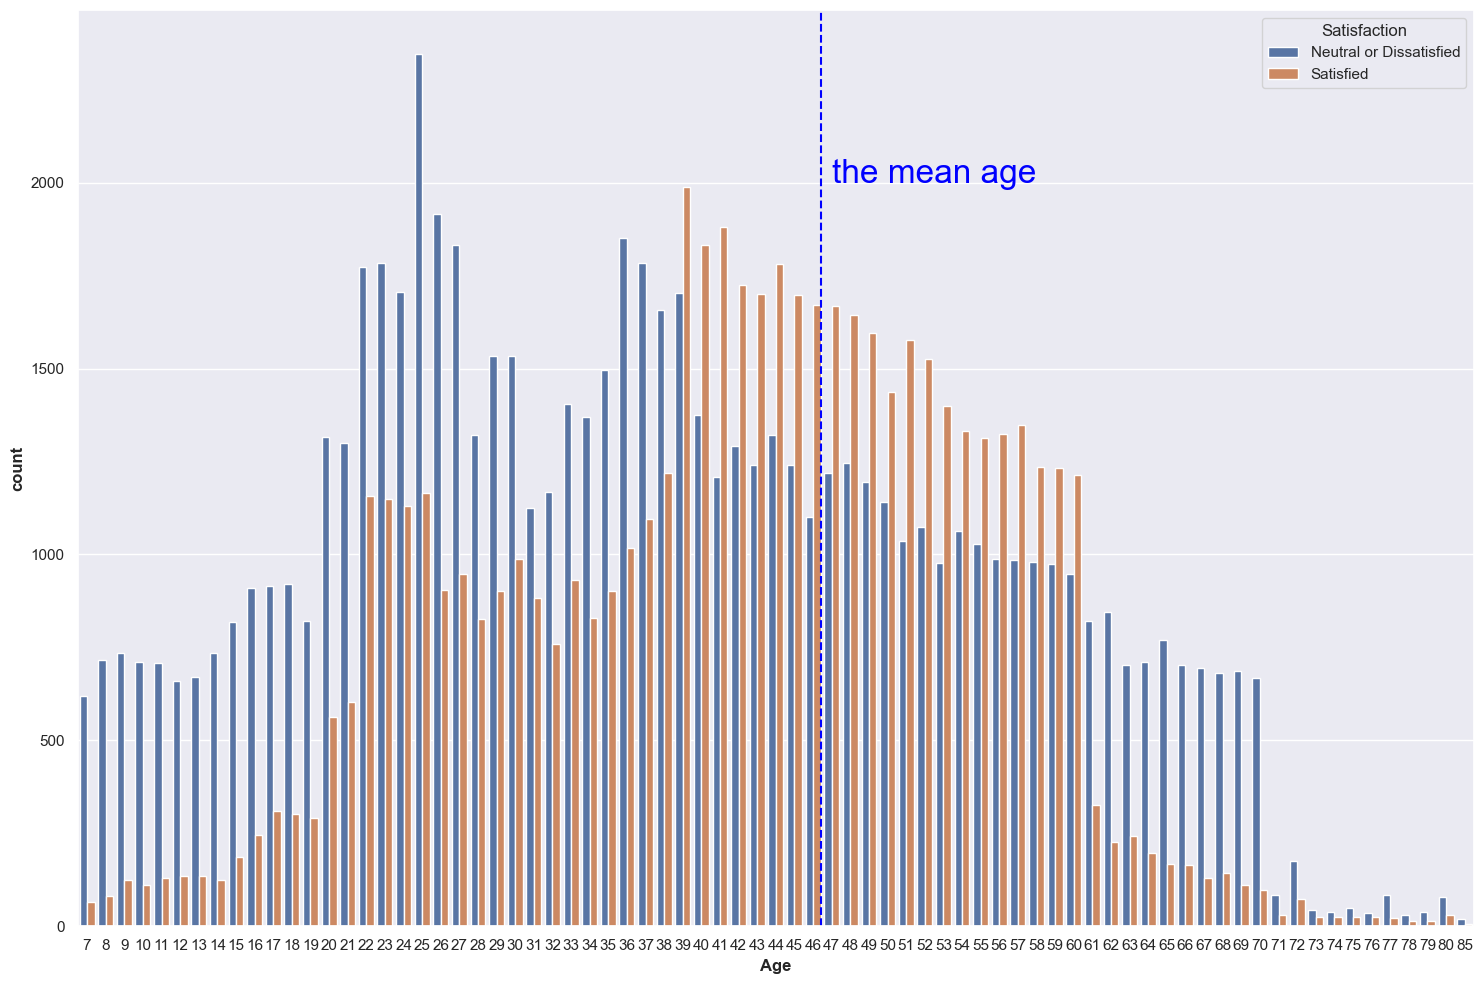

In [179]:
g = sns.countplot(x=df['Age'],hue=df['Satisfaction'])
mean_age=df['Age'].sum()/len(df['Age'])
plt.axvline(mean_age, linestyle='dashed', color='blue');
plt.text(40,2000,"the mean age",fontsize=24,color='blue');

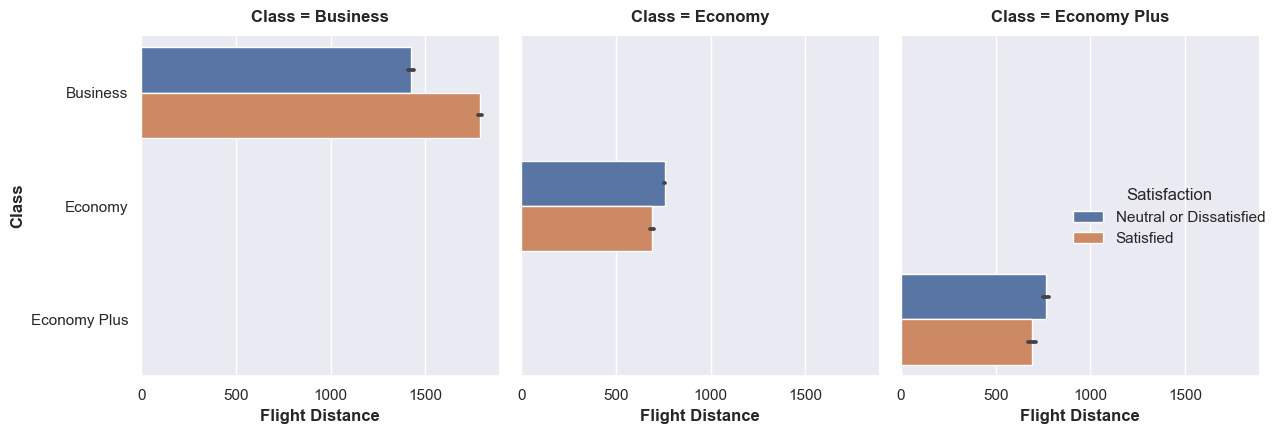

In [180]:
g = sns.catplot(x="Flight Distance", y="Class", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

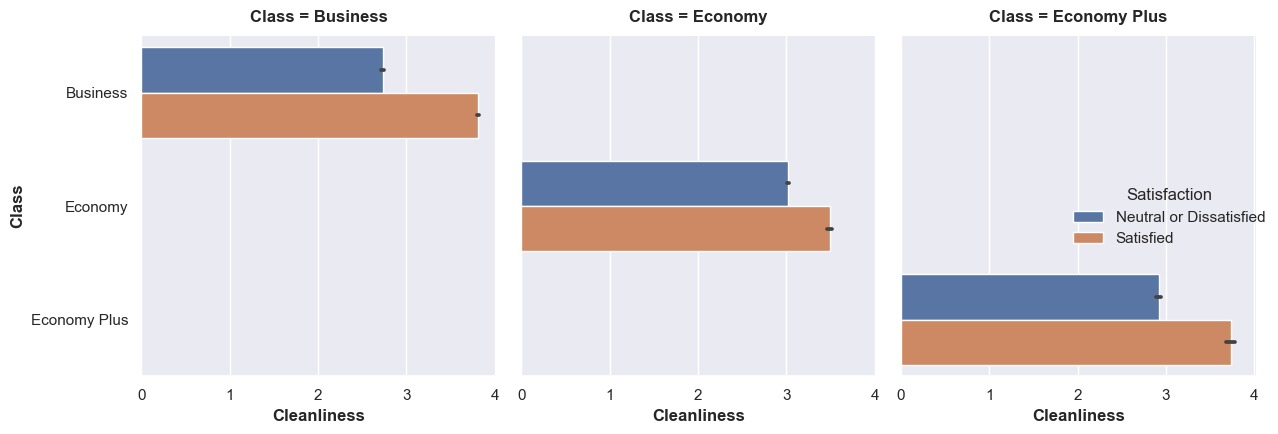

In [181]:
g = sns.catplot(x="Cleanliness", y="Class", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

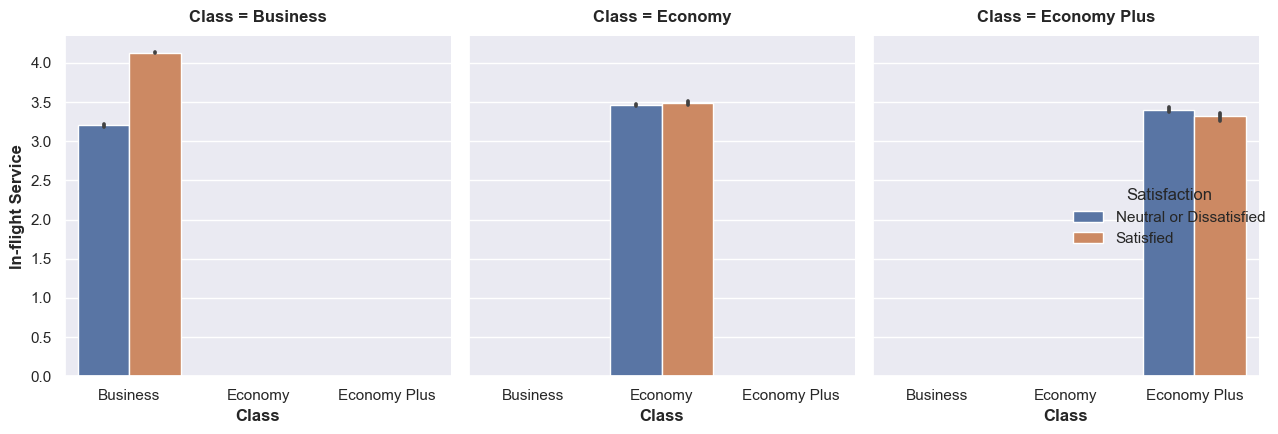

In [182]:
g = sns.catplot(y="In-flight Service", x="Class", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)

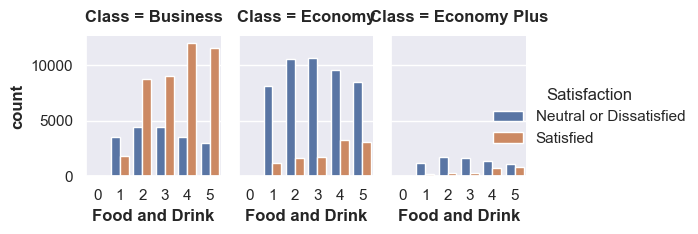

In [183]:
g = sns.catplot(x='Food and Drink', col="Class",hue='Satisfaction', col_wrap=4, data=df, kind="count", height=2.5, aspect=.5)

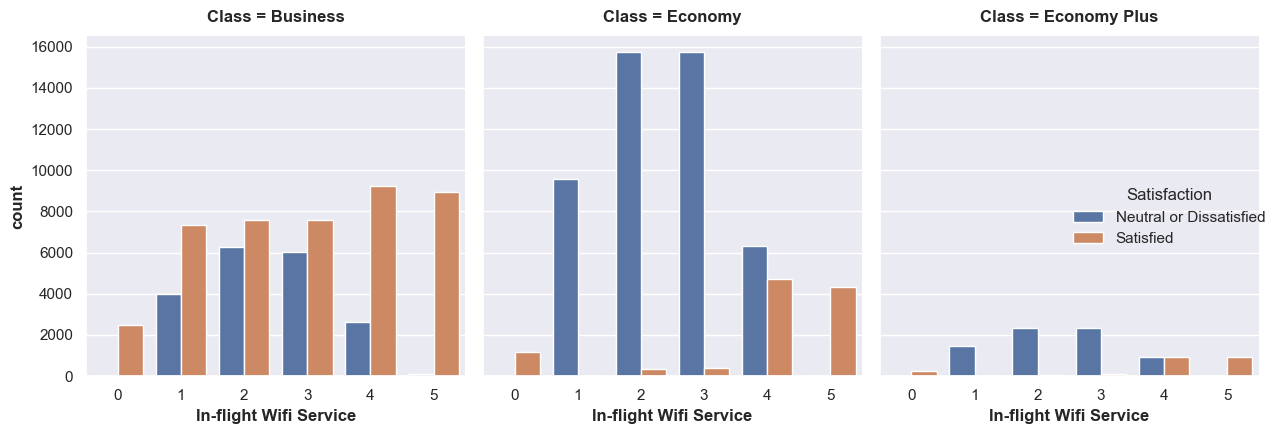

In [184]:
g = sns.catplot(x="In-flight Wifi Service", hue="Satisfaction", col="Class", data=df, kind="count", height=4.5, aspect=.8)

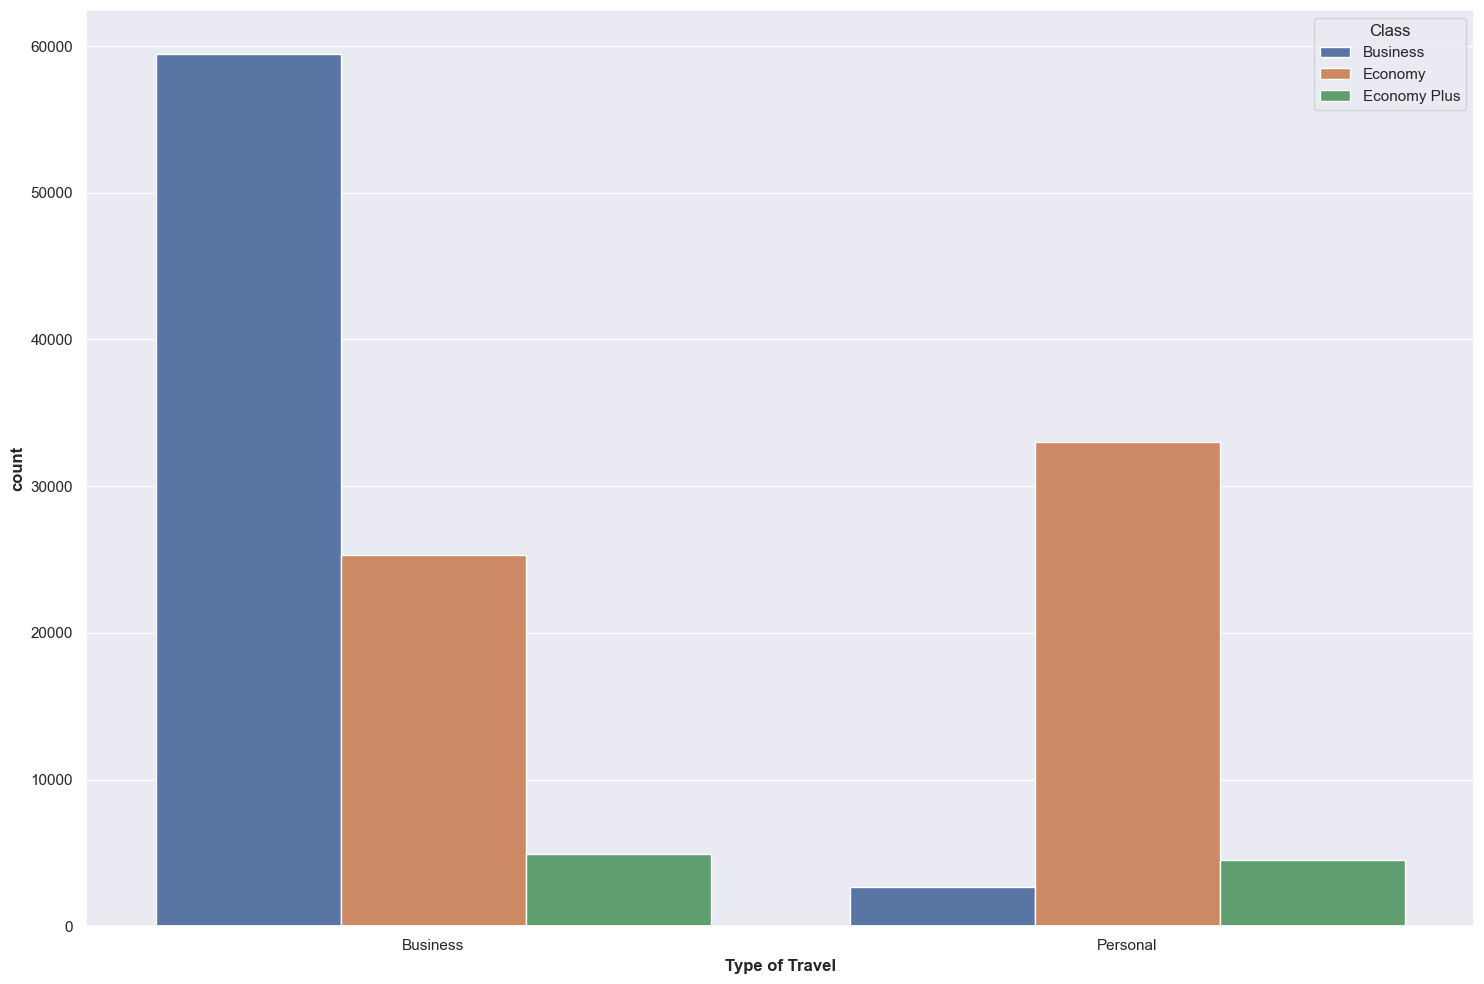

In [185]:
sns.countplot(x='Type of Travel',hue='Class',data=df);

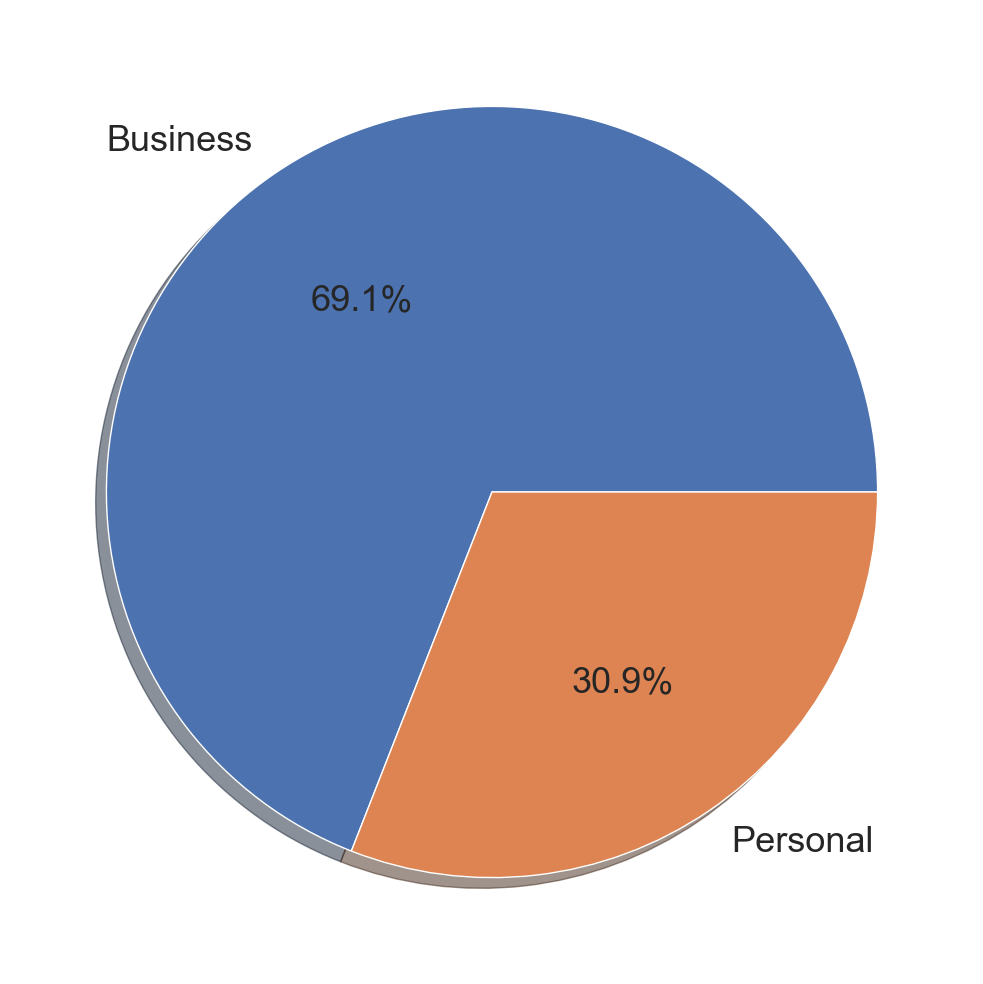

In [186]:
plt.pie(x=df['Type of Travel'].value_counts(), labels=['Business','Personal'],
                                          autopct='%1.1f%%', 
                                          shadow=True, 
                                          textprops={'fontsize':26});

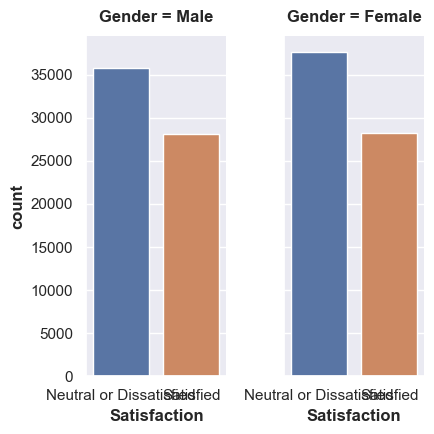

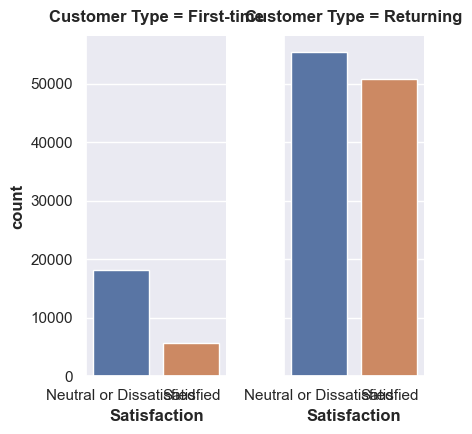

In [187]:
sns.catplot(x="Satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=4.5, aspect=0.5);
sns.catplot(x="Satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=4.5, aspect=0.5);
sns.set(font_scale=1)

# Preparing data for ML

In [191]:
import sklearn
from  import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)


ModuleNotFoundError: No module named 'sklearn'